In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = 'student-mat.csv'
data = pd.read_csv(url, sep=';')

In [6]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
data['failures'].corr(data['G3'])

np.float64(-0.360414940461649)

In [37]:
print("Correlation with G3:")
print(data[[ 'health', 'G3']].corr(numeric_only=True))


Correlation with G3:
          health        G3
health  1.000000 -0.061335
G3     -0.061335  1.000000


In [40]:
'''import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='romantic', hue='pass', data=data, palette='Set2')
plt.title("Pass/Fail Distribution by Romantic Relationship")
plt.xlabel("In Romantic Relationship")
plt.ylabel("Number of Students")
plt.legend(title='Pass', labels=['Fail', 'Pass'])
plt.show()'''


'import seaborn as sns\nimport matplotlib.pyplot as plt\n\nsns.countplot(x=\'romantic\', hue=\'pass\', data=data, palette=\'Set2\')\nplt.title("Pass/Fail Distribution by Romantic Relationship")\nplt.xlabel("In Romantic Relationship")\nplt.ylabel("Number of Students")\nplt.legend(title=\'Pass\', labels=[\'Fail\', \'Pass\'])\nplt.show()'

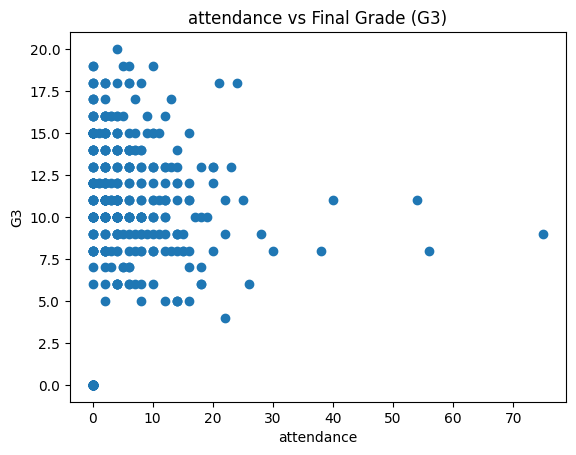

In [19]:
plt.scatter(data['absences'], data['G3'])
plt.title("attendance vs Final Grade (G3)")
plt.xlabel("attendance")
plt.ylabel("G3")
plt.show()


C:\Users\rsuma\AppData\Local\Temp\ipykernel_25552\2012253616.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass', y='studytime', data=data, palette="Set2")


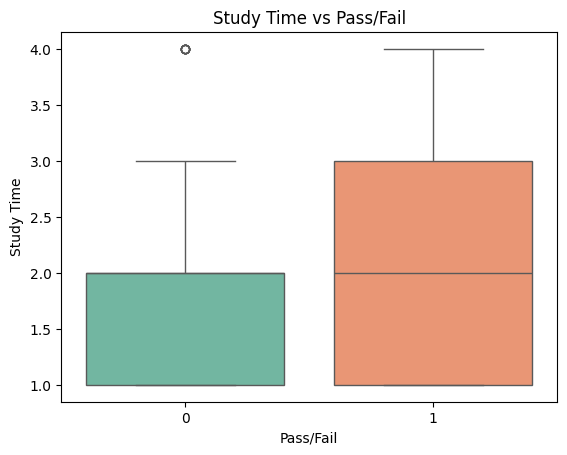

In [27]:
sns.boxplot(x='pass', y='studytime', data=data, palette="Set2")
plt.title("Study Time vs Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Study Time")
plt.show()



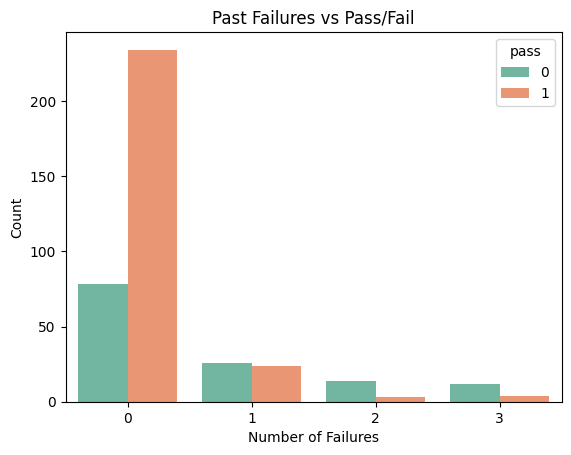

In [28]:
sns.countplot(x='failures', hue='pass', data=data, palette="Set2")
plt.title("Past Failures vs Pass/Fail")
plt.xlabel("Number of Failures")
plt.ylabel("Count")
plt.show()


C:\Users\rsuma\AppData\Local\Temp\ipykernel_25552\1018865915.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass', y='absences', data=data, palette="Set2")


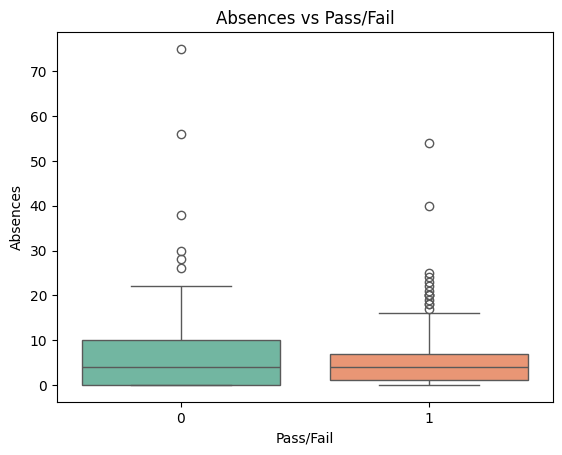

In [30]:
sns.boxplot(x='pass', y='absences', data=data, palette="Set2")
plt.title("Absences vs Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Absences")
plt.show()

C:\Users\rsuma\AppData\Local\Temp\ipykernel_25552\1148959105.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass', y='G1', data=data, palette="Set2")


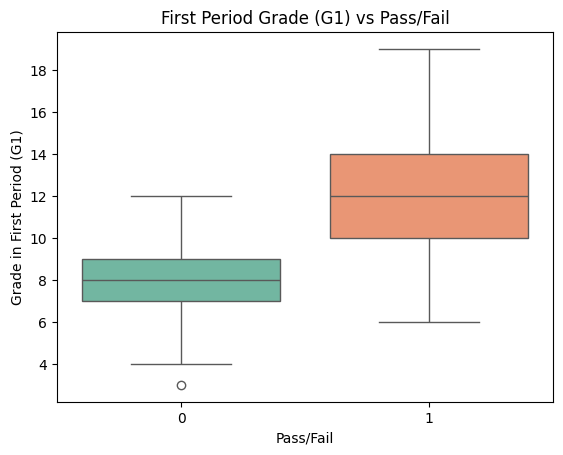

In [31]:
sns.boxplot(x='pass', y='G1', data=data, palette="Set2")
plt.title("First Period Grade (G1) vs Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Grade in First Period (G1)")
plt.show()


In [ ]:
# Features and target
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
X = data[features]
y = data['pass']

In [ ]:
# Create a pass/fail label
data['pass'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [33]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [34]:
# Function for prediction
def predict_pass_fail():
    print("Enter student details to predict pass/fail status:")
    studytime = int(input("Study time (1-4): "))
    failures = int(input("Number of past class failures: "))
    absences = int(input("Number of absences: "))
    G1 = int(input("Grade in first test (0–20): "))
    G2 = int(input("Grade in second test (0–20): "))
    
    input_data = np.array([[studytime, failures, absences, G1, G2]])
    prediction = model.predict(input_data)
    
    print("Prediction:", "Pass ✅" if prediction[0] == 1 else "Fail ❌")

# Run the prediction
predict_pass_fail()

Enter student details to predict pass/fail status:


Study time (1-4):  2
Number of past class failures:  8
Number of absences:  25
Grade in first test (0–20):  12
Grade in second test (0–20):  9


Prediction: Fail ❌


C:\Users\rsuma\miniforge3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
